In [55]:
import sys
from multiprocessing import Pool, cpu_count
import pandas as pd
from tqdm import tqdm
sys.path.append('../')
from wiki import val
from wiki.newphet import prophet_plot
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
cpus = cpu_count()
pool = Pool(cpus)
plot = lambda x: prophet_plot(x, uncertainty=False)

In [66]:
train_df = pd.read_csv('../data/train_1.csv') ; train_df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


Fix the rounding / clipping in the clipped version

In [121]:
for i in tqdm(range(len(train_df))):
    test_df = dfs[i].copy(True)
    test_df['y'] = train_df.iloc[i].drop('Page').values.astype(float)
    test_df['yhat'] = test_df['yhat'].clip(0).round().astype(int)
    break
    test_df.to_feather('../data/ali_pred_dfs/rnn_v2_clipped/rnn_v2_clipped_page_'+str(i)+'.f')

  0%|          | 0/145063 [00:00<?, ?it/s]


In [122]:
test_df.head()

,ds,y,y_org,yhat,train
0,2015-07-01,18.0,18.000000,18,1
1,2015-07-02,11.0,11.000000,11,1
2,2015-07-03,5.0,5.000001,5,1
3,2015-07-04,13.0,13.000000,13,1
4,2015-07-05,14.0,14.000000,14,1


In [154]:
smapes_capped = []
for i in tqdm(range(145063)):
    df = pd.read_feather('../data/ali_pred_dfs/rnn_v2_clipped/rnn_v2_clipped_page_'+str(i)+'.f')
    smapes_capped.append(val.smape_df(df[df.train == 0], 'y', 'yhat'))
smapes_capped = pd.Series(smapes_capped)
pd.DataFrame(smapes_capped, columns=['smapes']).to_feather('../data/rnn_v2_capped_smapes.f')

100%|██████████| 145063/145063 [13:01<00:00, 185.66it/s]


In [156]:
smapes = pd.read_feather('../data/rnn_v2_smapes.f')['smapes']
smapes_capped = pd.read_feather('../data/rnn_v2_capped_smapes.f')['smapes']

In [157]:
smapes.mean(), smapes_capped.mean()

(49.67496845652397, 45.883811616586662)

In [118]:
best = smapes.sort_values().head(20).index.values

In [114]:
best_capped = smapes_capped[smapes_capped>10].sort_values().head(10).index.values

In [ ]:
def read_dfs(idx):
    return pd.read_feather('../data/ali_pred_dfs/rnn_v2_page_'+str(i)+'.f')

In [13]:
dfs = [pd.read_feather('../data/ali_pred_dfs/rnn_v2_page_'+str(i)+'.f') for i in tqdm(range(145063))]  

100%|██████████| 145063/145063 [02:49<00:00, 855.43it/s]


34.7494277954


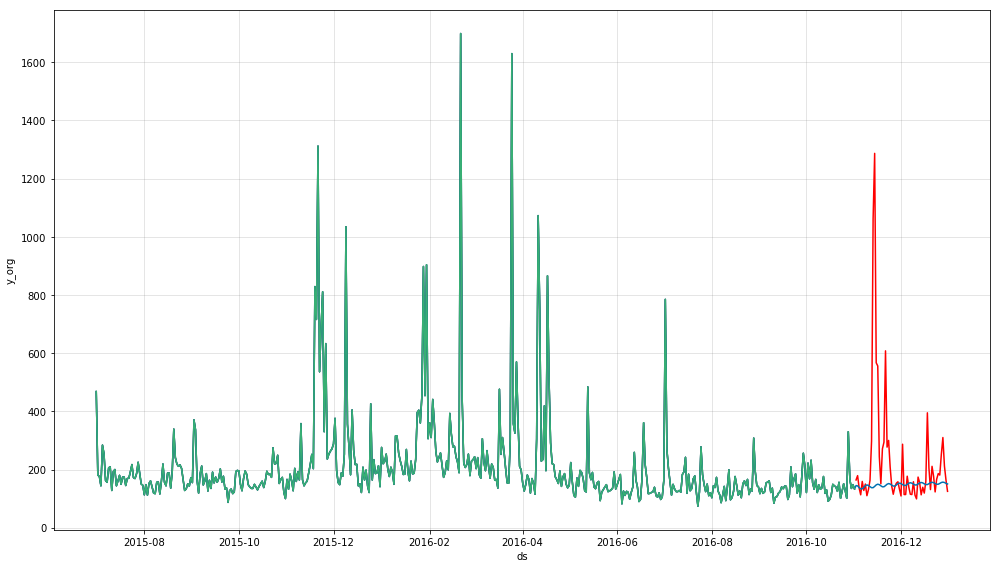

22.2462844849


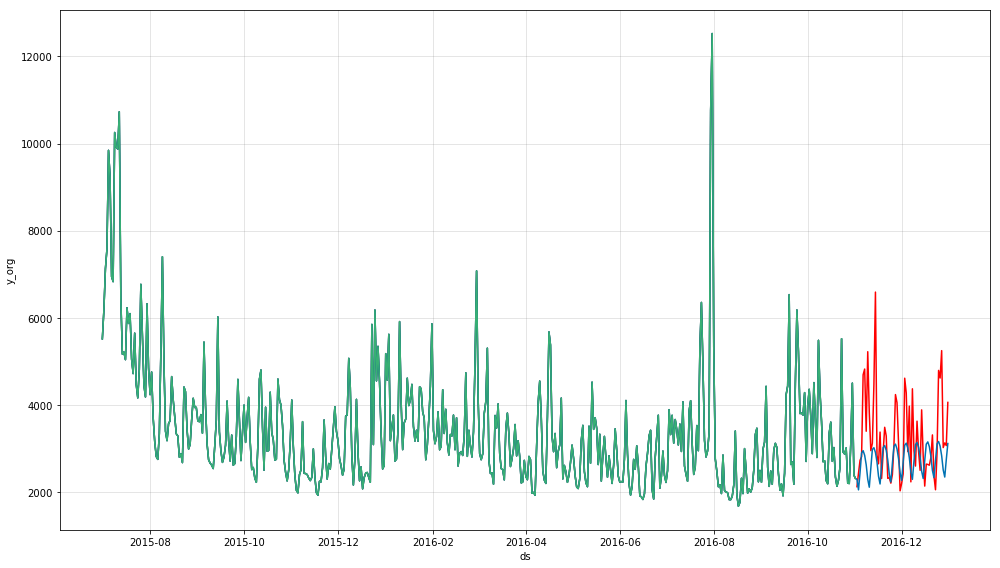

31.7571907043


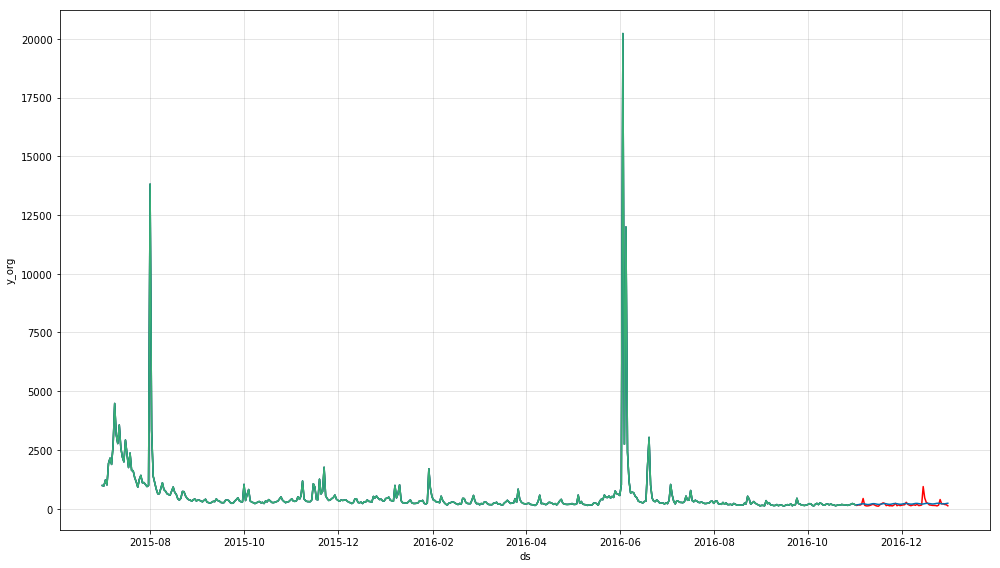

30.2316303253


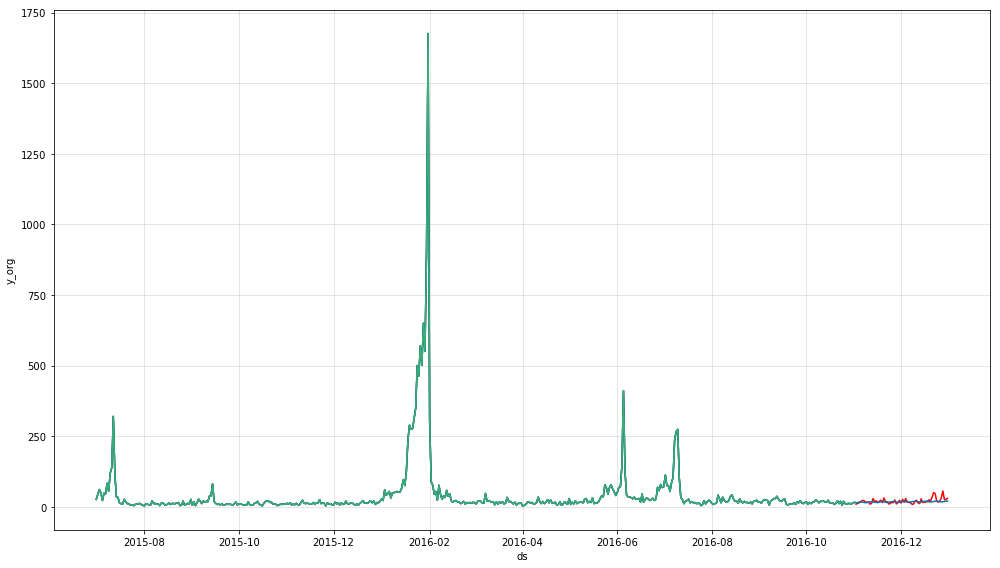

50.1717185974


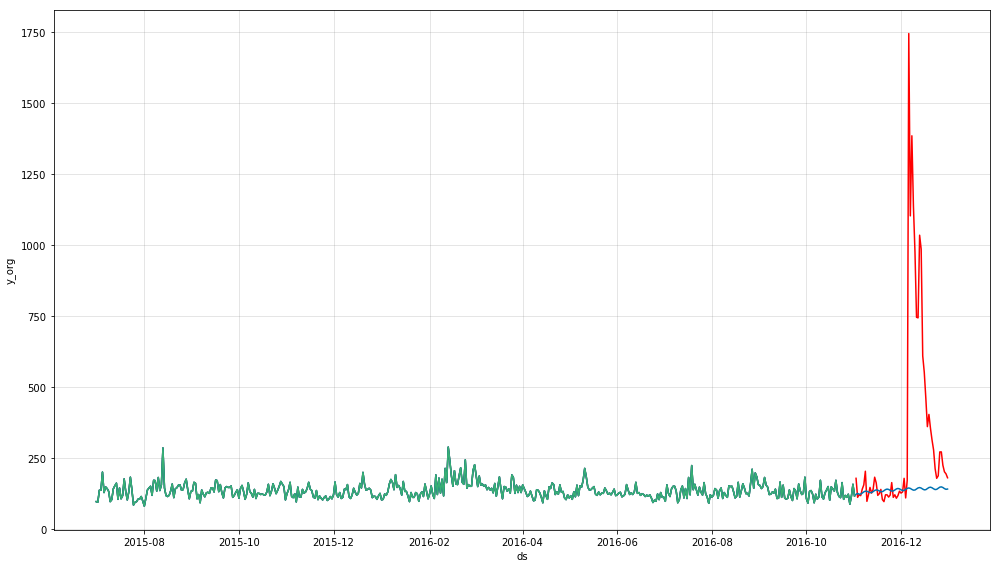

199.997512817


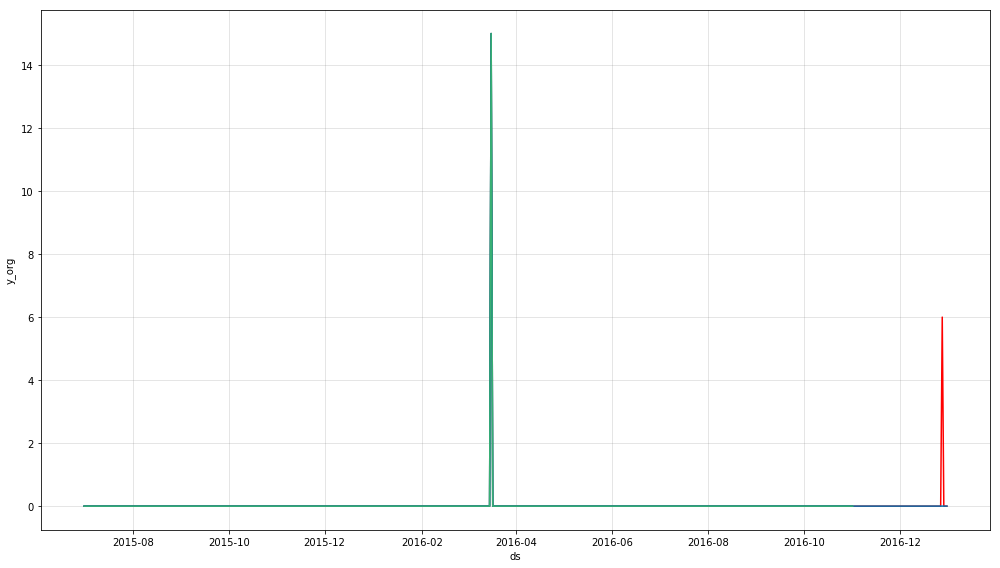

60.0570297241


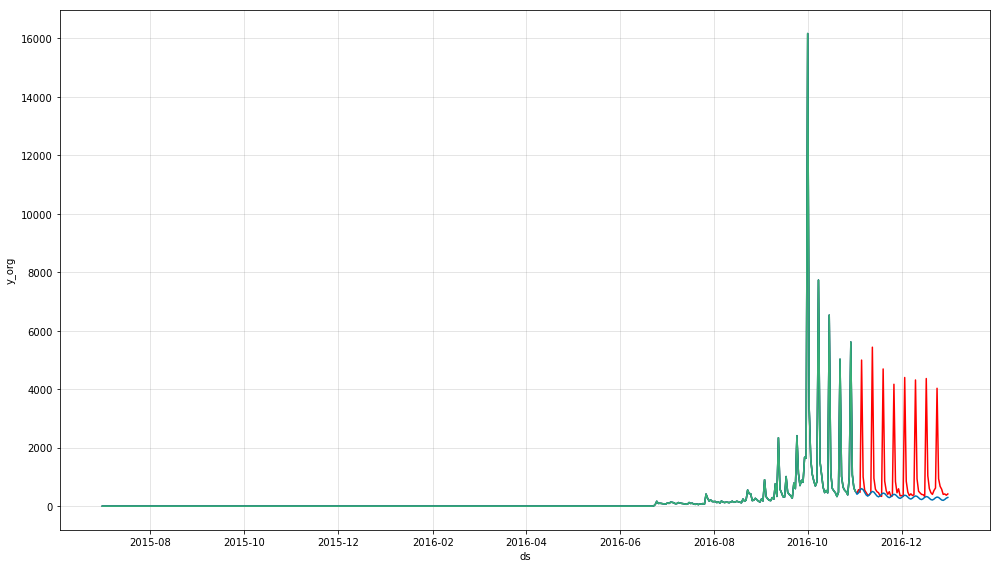

21.2915401459


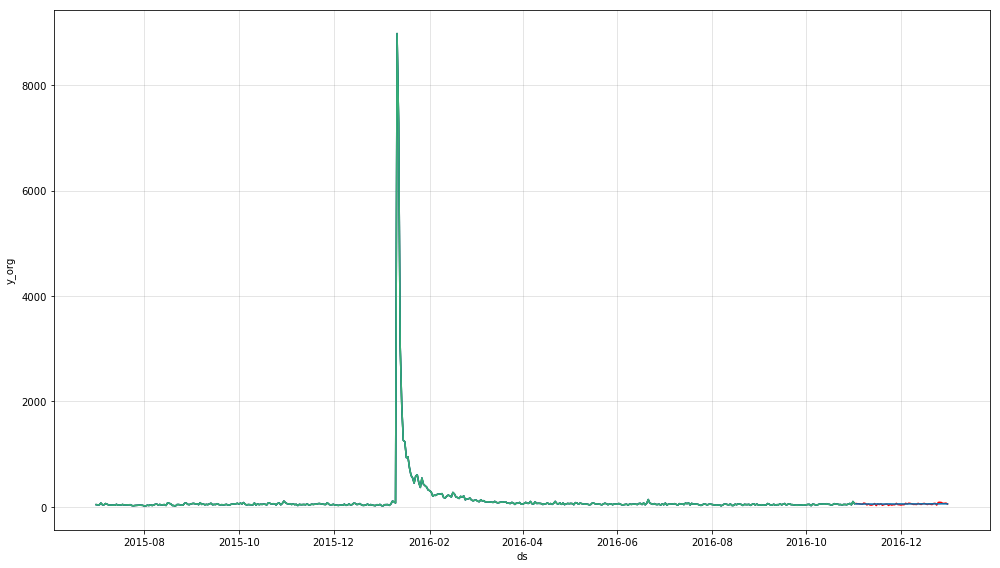

73.0420761108


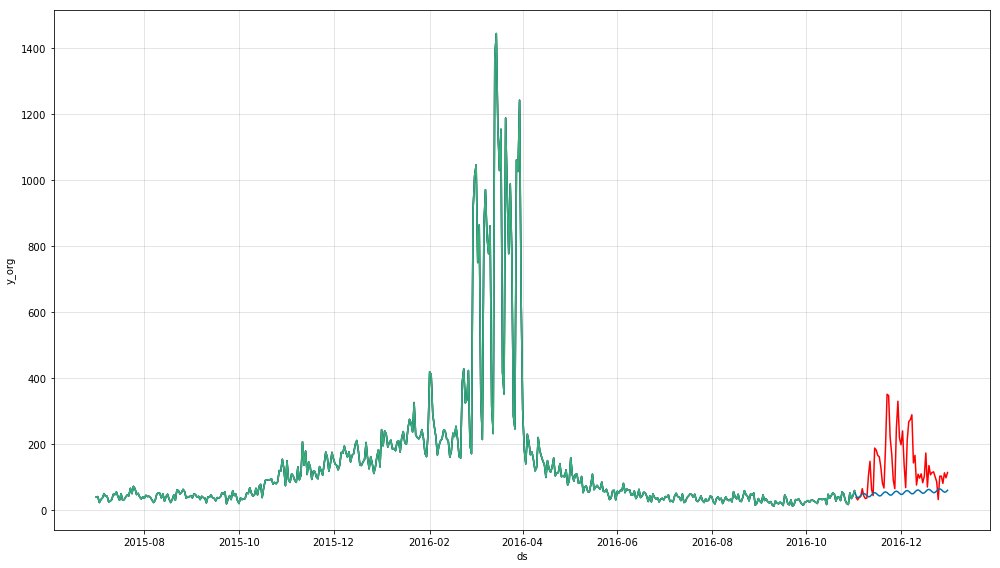

16.7890872955


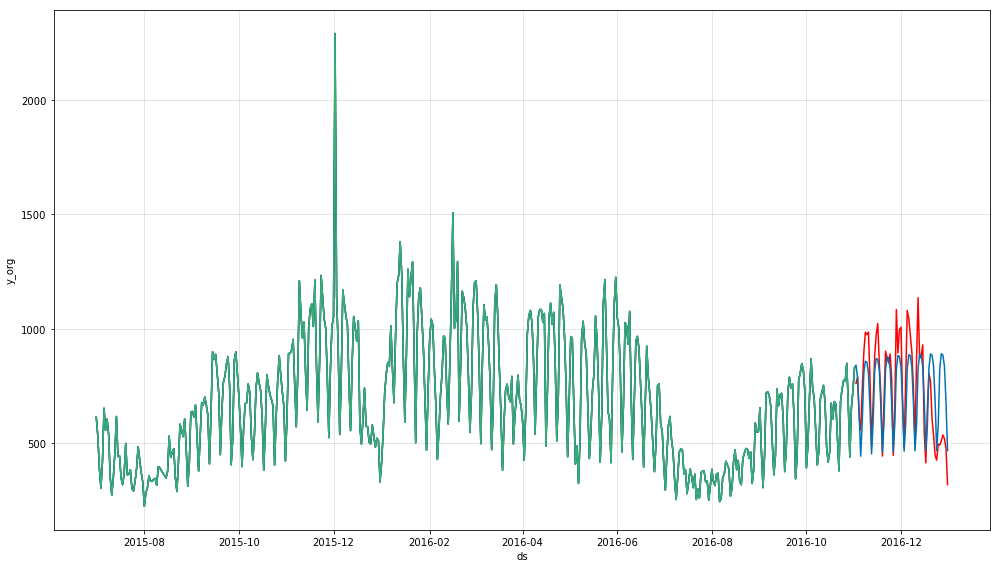

In [61]:
for x in best:
    print(smapes[x])
    plot(dfs[x])
    plt.show()

In [150]:
for i in best_capped:
    df = pd.read_feather('../data/ali_pred_dfs/rnn_v2_clipped/rnn_v2_clipped_page_'+str(i)+'.f')
    break
df.tail()

,ds,y,y_org,yhat,train
545,2016-12-27,105.0,105.000015,288,0
546,2016-12-28,108.0,107.999985,273,0
547,2016-12-29,105.0,105.000015,264,0
548,2016-12-30,69.0,68.999985,267,0
549,2016-12-31,103.0,102.999985,282,0


91.6675118246


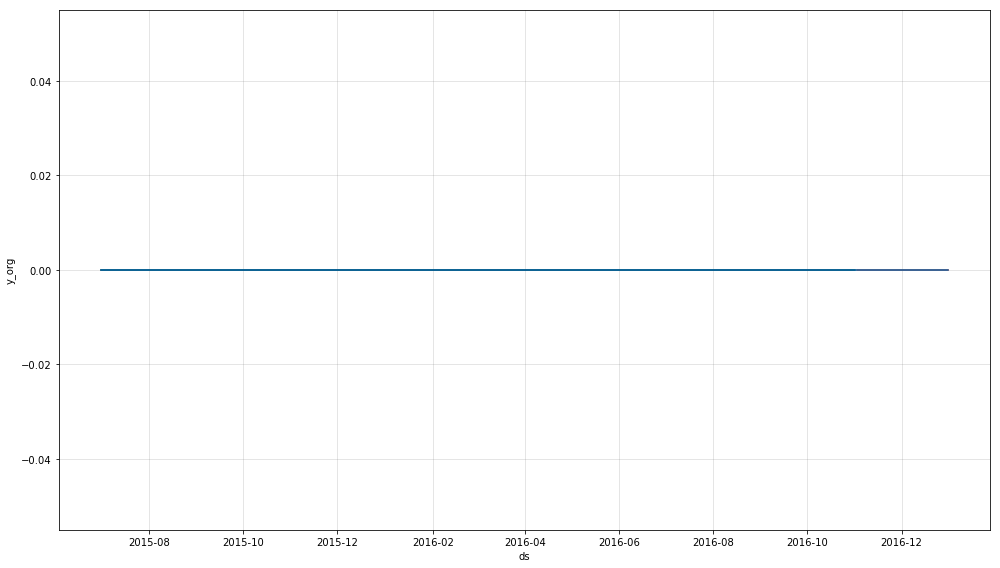

66.0097402597


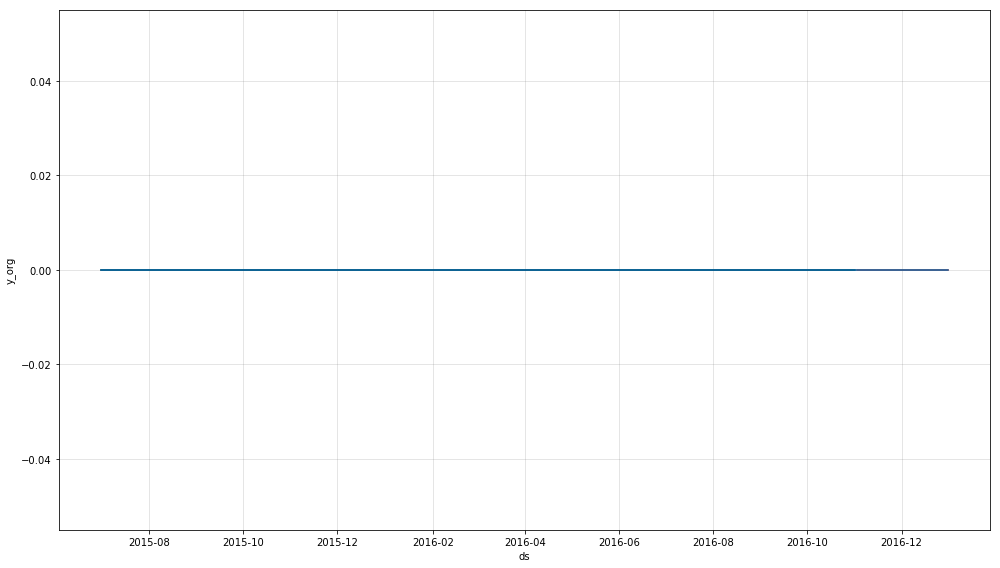

91.6860886131


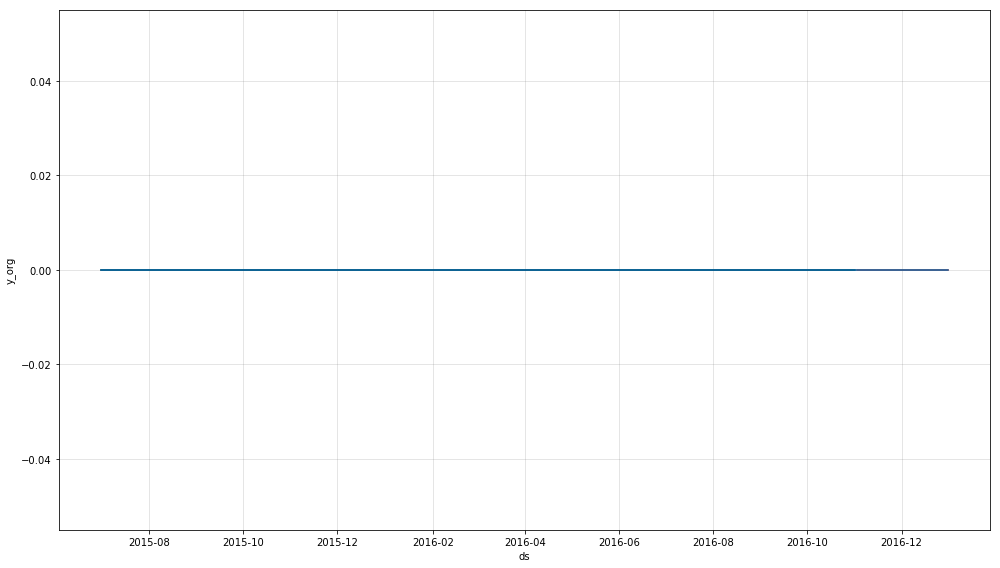

91.6966769331


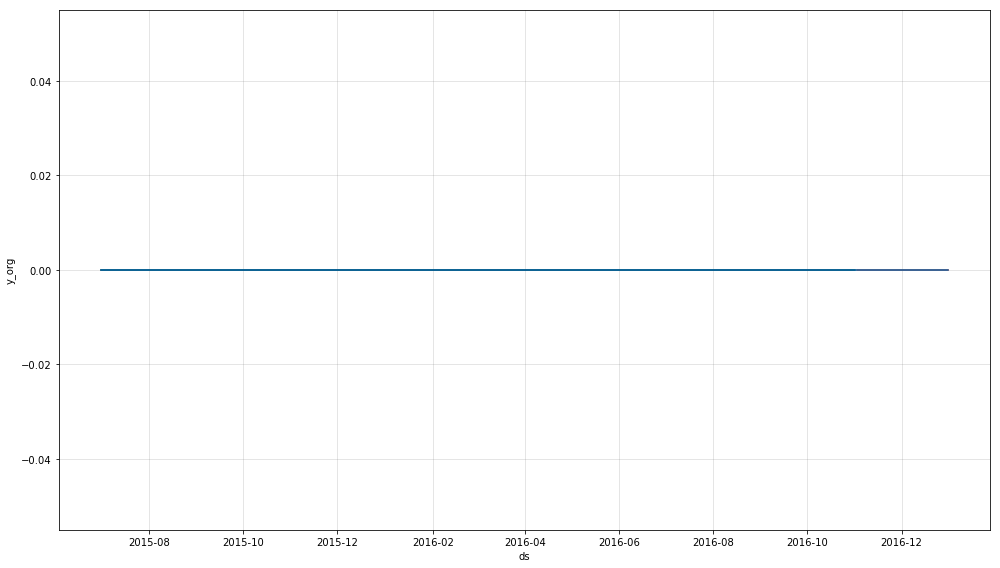

91.6984126984


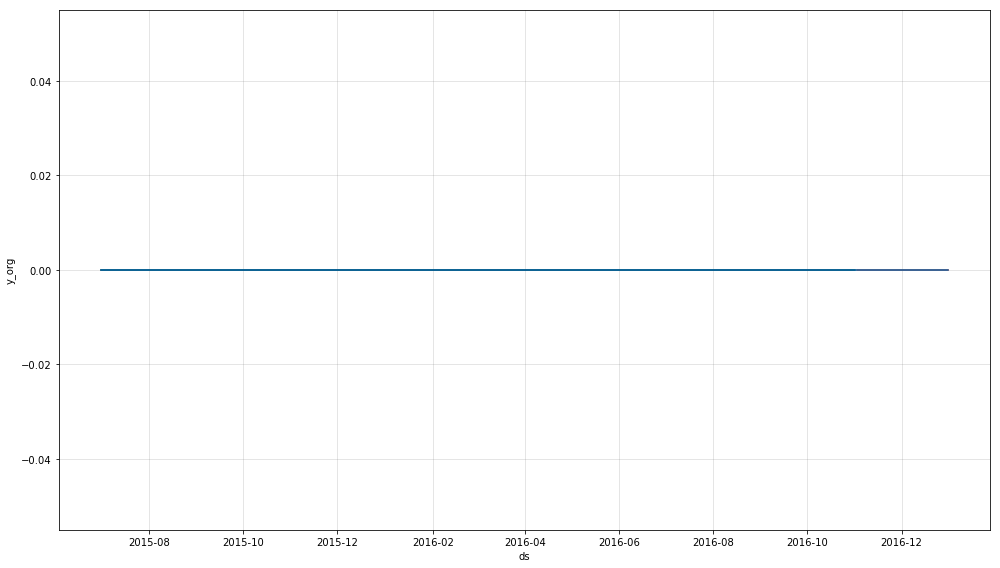

62.8559414993


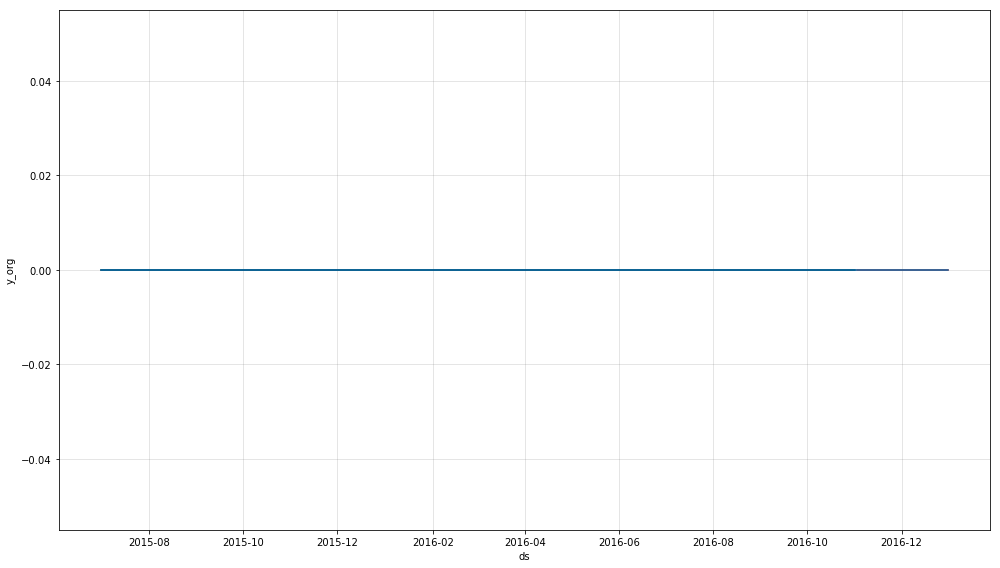

25.1769273907


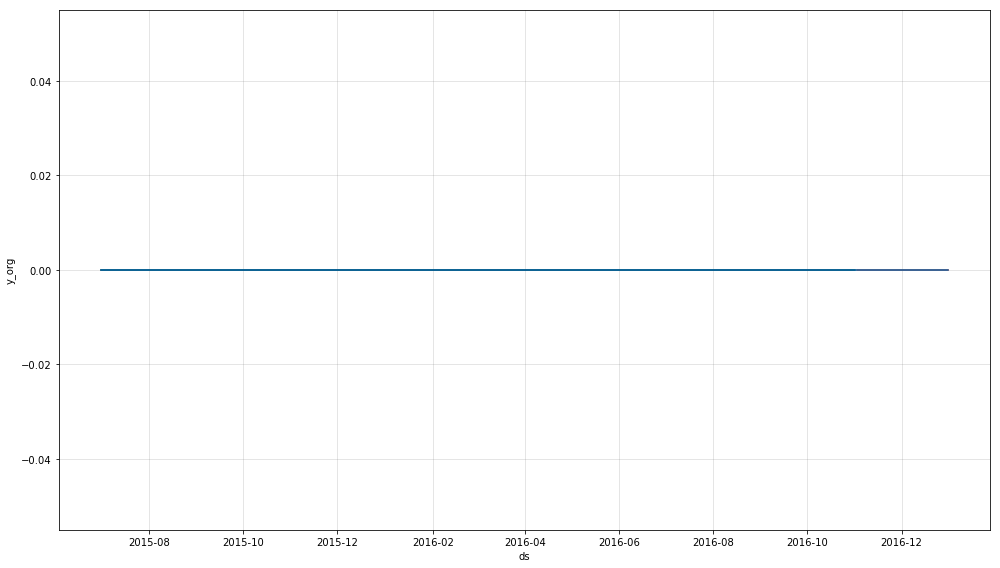

91.7043327043


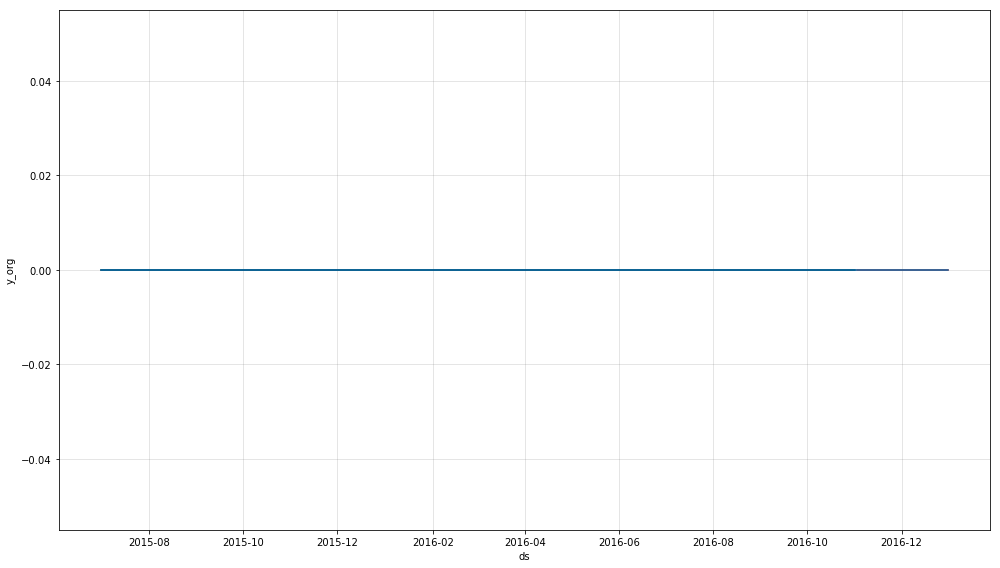

91.7088014947


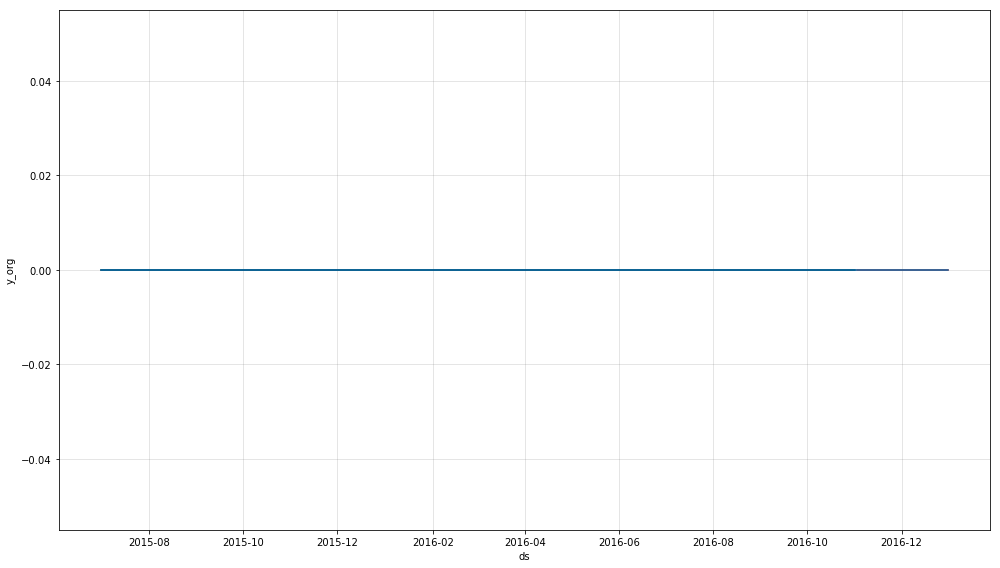

87.2687189354


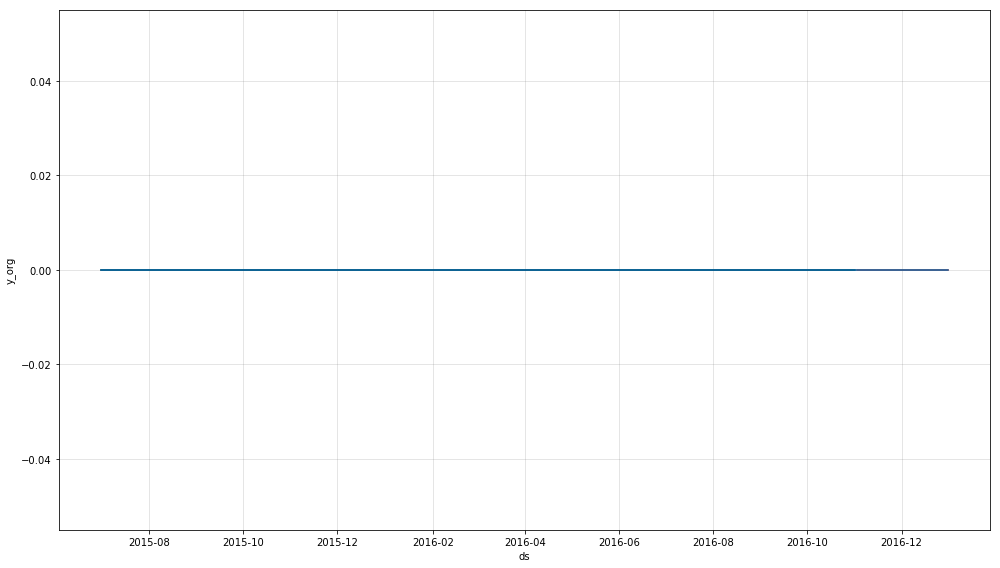

In [155]:
for x in best_capped:
    df = pd.read_feather('../data/ali_pred_dfs/rnn_v2_clipped/rnn_v2_clipped_page_'+str(i)+'.f')
    print(smapes_capped[x])
    plot(df)
    plt.show()

In [ ]:
recalculate_capped_smape(idx):
    test_df = pd.read_feather('../data/ali_pred_dfs/rnn_v2_page_'+str(i)+'.f')
    for col in ('y', 'y_org', 'yhat'):
        test_df[col] = test_df[col].clip(0).round().astype(int)
    return val.smape_df(test_df, 